In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

from bdcode import bayesian_decoder
from bdcode.dist import ConditionalKernelDensity

# Pretty plots
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

# Uncomment for local development
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
# Train data
N = 100
m_cat = 1
m_dog = 1.25

X_train = np.concatenate(
    (np.random.normal(m_cat, 1, N),
    np.random.normal(m_dog, 1, N))
)[:,np.newaxis]
y_train = np.asarray(['cat'] * N + ['dog'] * N)

# Train dist
kde = ConditionalKernelDensity()
kde.fit(X_train, y_train)

<IPython.core.display.Javascript object>

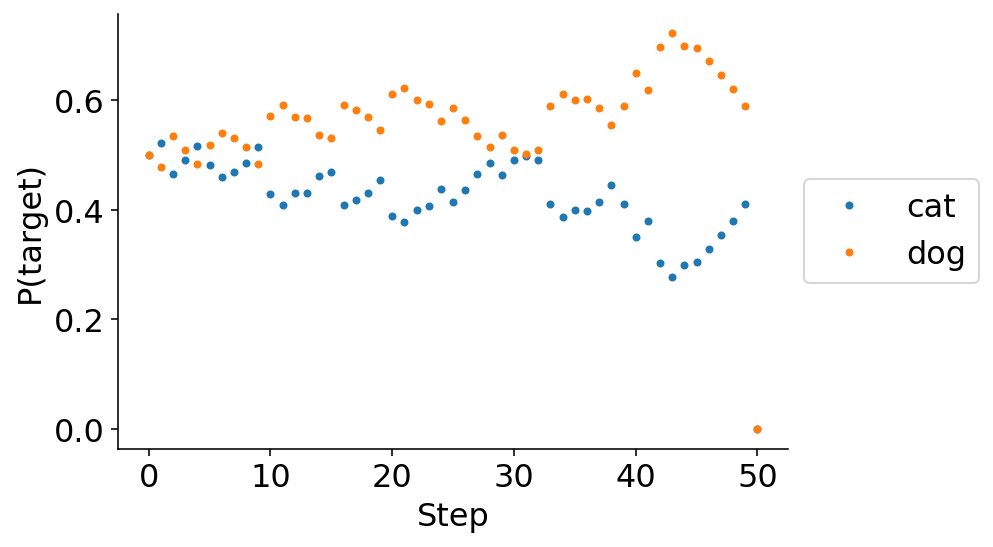

<IPython.core.display.Javascript object>

In [3]:
# Test data
M = 50
X_test = np.random.normal(m_dog, 1, M)[:,np.newaxis]
y_test = np.asarray(['dog'] * M)

# Decode
X_decode = bayesian_decoder(X_test, y_test, 0.5, kde)

# Vis
plt.plot(X_decode[:, 0], '.', label="cat")
plt.plot(X_decode[:, 1], '.', label="dog")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Step")
plt.ylabel("P(target)")
sns.despine()